# 경사하강법 (Gradient Descent)
### 학습률
- 최적의 해를 빠르게 혹은 천천히 조금씩 찾아가는 '정도'를 가르키는 하이퍼 파라미터
- 기본 값으로 보통 0.001을 사용

### 잔차제곱합 (Residual Sum of Squares, RSS)
- 잔차 = 실제 값 - 예측 값
- 잔차제곱합 = (실제 값 - 예측 값)의 제곱의 합
- 회귀 모델의 정확도를 측정하는 지표
    - RSS가 작을수록 정확하게 예측하는 모델
    - RSS가 클수록 잘못된 예측하는 모델

- 모든 회귀 모델은 RSS가 최소가 되는 방향으로 학습이 진행됨 = 회귀계수(절편)는 RSS가 최소가 되도록 학습
- 비용함수 R(w)가 가장 작을 때의 w를 찾는 것이 회귀 모델의 목표
    - 매 회차에 계산된 R(w)에서 순간변화율(기울기)를 구해야 함 -> 미분 사용
    - 단, 우리가 구해야 하는 회귀계수는 하나 이상이므로 우리는 편미분을 사용함
        - w0(절편)을 고정한 채로 w1이 미분을 구하고, w1을 고정한 채로 w0 미분을 구함

### 경사하강법 공식
$w1 = w1 - (미분값)$

$w1 = w1 - (-학습률 * 2 / N * (x * ( 실제값 - 예측값))의 합)$

$w0 = w0 - (미분값)$

$w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

# 0~1 사이의 100개의 난수 생성
X = np.random.rand(100, 1)
print(X.shape)
print(X)

noise = np.random.randn(100, 1) # 정구분표 난수를 노이즈로 사용
y = 6 + 4 * X + noise

plt.scatter(X, y)
plt.show()

In [3]:
# 경사하강법 실행

# 회귀계수(가중치) 초기화
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))

 # 잔차 계산
y_pred = w0 + np.dot(X, w1)
diff = y - y_pred

# 학습율
learning_rage = 0.01

# 데이터 개수
N = len(X)

# w0 편미분 (w0를 갱신할 값)
# $w1 = w1 - (-학습률 * 2 / N * (x ( 실제값 - 예측값))의 합)$
w0_diff = -learning_rage * 2 / N * np.sum(diff)
# 절편(w0) 갱신
w0 = w0 - w0_diff

# w1 편미분 (w1를 갱신할 값)
# $w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)$
w1_diff = -learning_rage * 2 / N * np.dot(X.T, diff)  # X, diff (100, 1) (100, 1) np.dot -> 내적 합
# 가중치(w1) 갱신
w1 = w1 - w1_diff

print(f"1회 업데이트된 회귀계수 w0: {w0}, w1: {w1}")


1회 업데이트된 회귀계수 w0: [[0.16167019]], w1: [[0.08298126]]


In [10]:
def gradient_descent(X, y, learning_rage=0.01, max_iter=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 학습율
    # learning_rage = 0.01

    # 데이터 개수
    N = len(X)

    for i in range(max_iter):
        # 잔차 계산
        y_pred = w0 + np.dot(X, w1)
        diff = y - y_pred

        # w0 편미분 (w0를 갱신할 값)
        # $w1 = w1 - (-학습률 * 2 / N * (x ( 실제값 - 예측값))의 합)$
        w0_diff = -learning_rage * 2 / N * np.sum(diff)
        # 절편(w0) 갱신
        w0 = w0 - w0_diff

        # w1 편미분 (w1를 갱신할 값)
        # $w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)$
        w1_diff = -learning_rage * 2 / N * np.dot(X.T, diff)  # X, diff (100, 1) (100, 1) np.dot -> 내적 합
        # 가중치(w1) 갱신
        w1 = w1 - w1_diff

        plt.figure(figsize=(3, 2))
        plt.scatter(X, y)
        plt.plot(X, y_pred, color='red')
        plt.show()

    return w0, w1

In [11]:
def cost_function(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

In [ ]:
w0, w1 = gradient_descent(X, y)

print('최종 회귀 계수(가중치):', w1)
print('최종 회귀 계수(절편):', w0)

In [8]:
y_pred = w0 + np.dot(X, w1)
print('비용 함수 결과:', cost_function(y, y_pred))

비용 함수 결과: 1.4569510352266337


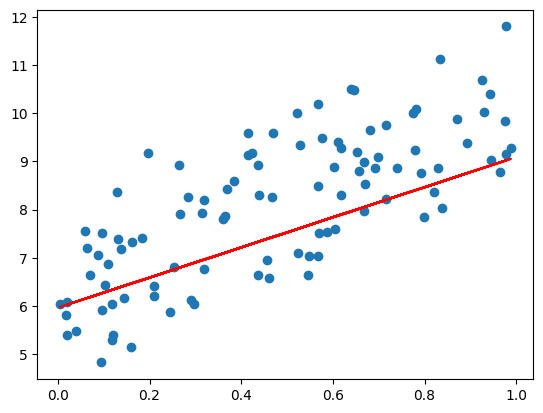

In [13]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

### 미니 배치 경사하강법(Mini-batch Gradient Descent)

In [14]:
def mini_batch_gradient_descent(X, y, batch_size=10, learning_rage=0.01, max_iter=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 학습율
    # learning_rage = 0.01

    # 데이터 개수
    N = batch_size

    for i in range(max_iter):
        # 미니배치 데이터 선정
        random_index = np.random.permutation(X.shape[0]) # 100개의 인덱스 반환
        X_sample = X[random_index[:batch_size]]
        y_semple = y[random_index[:batch_size]]

        # 잔차 계산
        y_pred = w0 + np.dot(X_sample, w1)
        diff = y_semple - y_pred

        # w0 편미분 (w0를 갱신할 값)
        # $w1 = w1 - (-학습률 * 2 / N * (x ( 실제값 - 예측값))의 합)$
        w0_diff = -learning_rage * 2 / N * np.sum(diff)
        # 절편(w0) 갱신
        w0 = w0 - w0_diff

        # w1 편미분 (w1를 갱신할 값)
        # $w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)$
        w1_diff = -learning_rage * 2 / N * np.dot(X_sample.T, diff)  # X, diff (100, 1) (100, 1) np.dot -> 내적 합
        # 가중치(w1) 갱신
        w1 = w1 - w1_diff

        plt.figure(figsize=(3, 2))
        plt.scatter(X, y)
        plt.plot(X_sample, y_pred, color='red')
        plt.show()

    return w0, w1

In [ ]:
w0, w1 = mini_batch_gradient_descent(X, y, max_iter=100)

print('최종 회귀 계수(가중치):', w1)    # model.coef_
print('최종 회귀 계수(절편):', w0)      # model.intercept_